## Projeto Megaline

### Descrição
    A Operadora Megaline está insatifeito com a adesão dos seus clientes à planos ultrapassados, vamos analisar o comportamento dos clientes para que possamos sugerir planos novos com aderencia a preferência de cada um.
   

### Iniciando a análise

Iniciarei baixando as bibliotecas que acredito que serão úteis no processo de análise.

In [1]:
# Importando os pacotes que serão utilizados

# Para manipulação e tratamento dos dados
import numpy as np
import pandas as pd 
import time 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Bibliotecas do Skit Learn
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import accuracy_score 
from sklearn.neighbors import KNeighborsClassifier 


## Coleta de Dados
<p> Utilizaremos o arquivo user_behavior_upd.csv para importar os nosso dataset

In [2]:
df_original = pd.read_csv('/datasets/users_behavior_upd.csv')

## Analise Exploratória

<p> Vamos analisar as variáveis categoricas e númericas e identificar os dados que precisarão ser tratados

In [3]:
# Visualizar as Linhas e Colunas do Arquivo --> Observações e Variáveis
df_original.shape

(3214, 5)

In [4]:
# Visualizar as primeiras linha do arquivo
df_original.head()

,calls,minutes,messages,mb_used,is_ultimate
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [5]:
# Verificar os tipos de dados das variáveis
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   calls        3214 non-null   float64
 1   minutes      3214 non-null   float64
 2   messages     3214 non-null   float64
 3   mb_used      3214 non-null   float64
 4   is_ultimate  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [6]:
# Resumo estatistico básico do nosso dataset
df_original.describe()

,calls,minutes,messages,mb_used,is_ultimate
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


In [7]:
df_ultimate_0 = df_original.loc[df_original['is_ultimate'] == 0.0].copy()
df_ultimate_0.describe()

,calls,minutes,messages,mb_used,is_ultimate
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.0
mean,58.463437,405.942952,33.384029,16208.466949,0.0
std,25.939858,184.512604,28.227876,5870.498853,0.0
min,0.000000,0.000000,0.000000,0.000000,0.0
25%,40.000000,274.230000,10.000000,12643.050000,0.0
50%,60.000000,410.560000,28.000000,16506.930000,0.0
75%,76.000000,529.510000,51.000000,20043.060000,0.0
max,198.000000,1390.220000,143.000000,38552.620000,0.0


In [8]:
df_ultimate = df_original.loc[df_original['is_ultimate'] == 1.0].copy()
df_ultimate.describe()

,calls,minutes,messages,mb_used,is_ultimate
count,985.000000,985.000000,985.000000,985.000000,985.0
mean,73.392893,511.224569,49.363452,19468.823228,1.0
std,43.916853,308.031100,47.804457,10087.178654,0.0
min,0.000000,0.000000,0.000000,0.000000,1.0
25%,41.000000,276.030000,6.000000,11770.280000,1.0
50%,74.000000,502.550000,38.000000,19308.010000,1.0
75%,104.000000,730.050000,79.000000,26837.720000,1.0
max,244.000000,1632.060000,224.000000,49745.730000,1.0


In [9]:
# Verificando valores missing
print(df_original.isna().sum())

calls          0
minutes        0
messages       0
mb_used        0
is_ultimate    0
dtype: int64


In [10]:
# Verificando Valores Únicos
df_original.nunique()

calls           184
minutes        3144
messages        180
mb_used        3203
is_ultimate       2
dtype: int64

### Analisando as Variáveis Categoricas

In [11]:
# Agrupar os valores da variável 
df_original.groupby(['calls']).size()

calls
0.0      40
1.0      12
2.0      19
3.0       9
4.0       9
         ..
189.0     1
196.0     1
198.0     1
203.0     1
244.0     1
Length: 184, dtype: int64

In [12]:
# Agrupar os valores da variável 
df_original.groupby(['minutes']).size()

minutes
0.00       40
0.10        1
1.00        3
1.37        1
1.78        1
           ..
1354.75     1
1364.83     1
1390.22     1
1566.45     1
1632.06     1
Length: 3144, dtype: int64

In [13]:
# Agrupar os valores da variável 
df_original.groupby(['messages']).size()

messages
0.0      497
1.0       37
2.0       32
3.0       36
4.0       34
        ... 
197.0      1
201.0      1
211.0      1
223.0      1
224.0      1
Length: 180, dtype: int64

In [14]:
# Agrupar os valores da variável 
df_original.groupby(['mb_used']).size()

mb_used
0.00        11
0.01         2
201.08       1
365.09       1
370.06       1
            ..
43931.39     1
44296.86     1
45180.75     1
48351.61     1
49745.73     1
Length: 3203, dtype: int64

In [15]:
# Agrupar os valores da variável 
df_original.groupby(['is_ultimate']).size()

is_ultimate
0    2229
1     985
dtype: int64

### Analisando as Variaveis Numéricas

In [16]:
# Carregar variaveis para plot

variaveis_numericas = []
for i in df_original.columns[:4].tolist():
        if df_original.dtypes[i] == 'int64' or df_original.dtypes[i] == 'float64':            
            print(i, ':' , df_original.dtypes[i]) 
            variaveis_numericas.append(i)    

calls : float64
minutes : float64
messages : float64
mb_used : float64


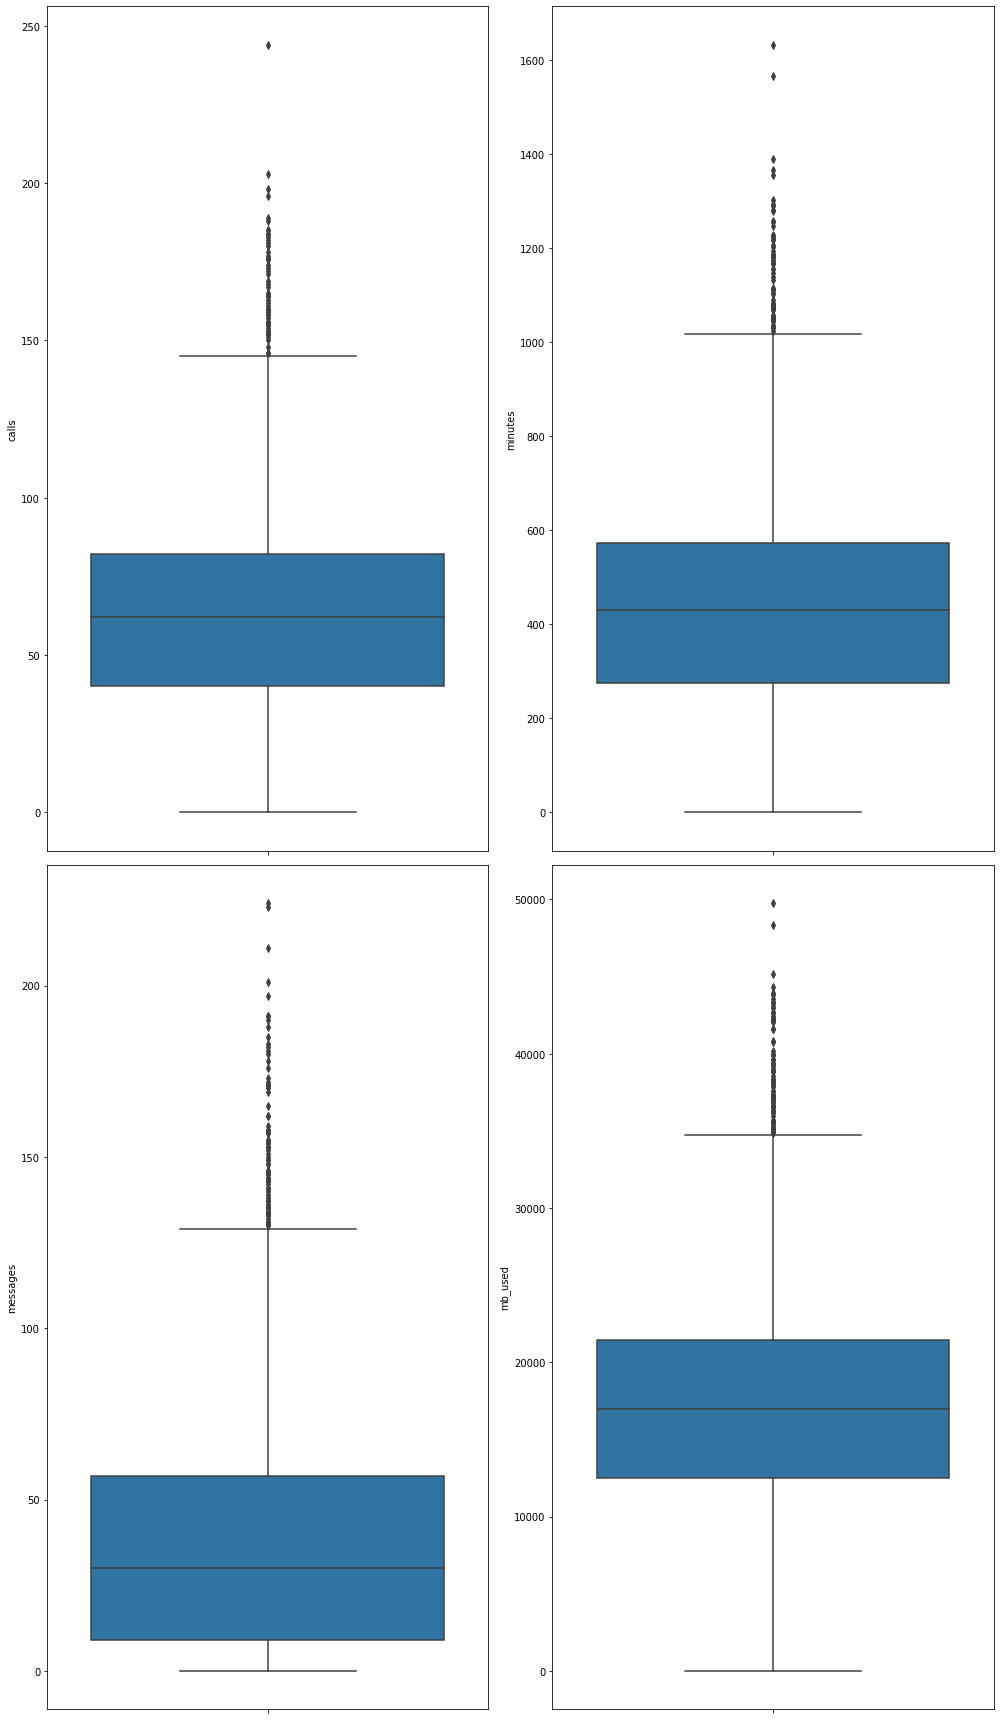

In [17]:
#Podemos observar nos boxplots abaixo que algumas variáveis númericas apresentam uma grande quantidade de "possíveis" outliers
#Precisamos avaliar cada uma dessas variaveis dentro do contexto dos dados para saber se realmente iremos trata-las como outlier


plt.rcParams["figure.figsize"] = [14.00, 24.00]
plt.rcParams["figure.autolayout"] = True
f, axes = plt.subplots(2, 2) #2 linhas e 2 colunas

linha = 0
coluna = 0
variaveis_numericas = ['calls', 'minutes', 'messages', 'mb_used']
for i in variaveis_numericas:
    sns.boxplot(data = df_original, y=i, ax=axes[linha][coluna])
    coluna += 1
    if coluna == 2:
        linha += 1
        coluna = 0            

plt.show()

#### Conclusão intermediária
Em nossos dados foi possível ver que não haviam dados faltantes ou ausentes dentre as 3214 linhas do nosse dataframe, em todas as colunas categóricas possuem outliers que precisam ser avaliados com mais delicadeza, nossas colunas possuem valores 0.0 indicando que tem pessoas que dexam de utilizar algum pacote fornecido pela empresa, o mais chamativo é o de `messages` que possue 497 clientes que ão utiliza esse sistema.

## Divisão dos dados

Serão divididos os dados de origem em um conjunto de treinamento, um conjunto de validação e um conjunto de teste com base na coluna `is_ultimate`.

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# Separar as variáveis independentes (X) e dependentes (y)
X = df_original.drop('is_ultimate', axis=1)
y = df_original['is_ultimate']

In [20]:
# Dividir os dados em conjuntos de treinamento, validação e teste
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=42)

print("Conjunto de treinamento: ", X_train.shape, y_train.shape)
print("Conjunto de validação: ", X_val.shape, y_val.shape)
print("Conjunto de teste: ", X_test.shape, y_test.shape)

Conjunto de treinamento:  (1928, 4) (1928,)
Conjunto de validação:  (643, 4) (643,)
Conjunto de teste:  (643, 4) (643,)


In [21]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [22]:
# Treinando e avaliando os modelos
models = {'Logistic Regression': LogisticRegression(random_state=42),
          'Decision Tree': DecisionTreeClassifier(random_state=42),
          'Random Forest': RandomForestClassifier(random_state=42)}

In [23]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    print(name)
    print('Acurácia: {:.4f}'.format(accuracy_score(y_val, y_pred)))
    print('Precisão: {:.4f}'.format(precision_score(y_val, y_pred)))
    print('-'*30)

Logistic Regression
Acurácia: 0.7201
Precisão: 0.6500
------------------------------
Decision Tree
Acurácia: 0.7309
Precisão: 0.5503
------------------------------
Random Forest
Acurácia: 0.7947
Precisão: 0.7143
------------------------------


In [24]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name)
    print('Acurácia: {:.4f}'.format(accuracy_score(y_test, y_pred)))
    print('Precisão: {:.4f}'.format(precision_score(y_test, y_pred)))
    print('-'*30)

Logistic Regression
Acurácia: 0.7030
Precisão: 0.4516
------------------------------
Decision Tree
Acurácia: 0.7325
Precisão: 0.5430
------------------------------
Random Forest
Acurácia: 0.8087
Precisão: 0.7273
------------------------------


In [25]:
#Para tirar a prova real do modelo de floresta aleatória que desenvolvemos, podemos utilizar o conjunto de dados de teste que separamos anteriormente. 
#Vamos usar a função predict para fazer previsões para os dados de teste e comparar com as classes reais.


# Fazendo previsões com o modelo de floresta aleatória
y_pred = model.predict(X_test)

In [26]:
# Comparando com as classes reais
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do modelo de floresta aleatória: {:.2f}%".format(accuracy*100))

Acurácia do modelo de floresta aleatória: 80.87%


In [27]:
# Calculando outras métricas de desempenho
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [28]:
print("Precisão do modelo de floresta aleatória: {:.2f}%".format(precision*100))
print("Recall do modelo de floresta aleatória: {:.2f}%".format(recall*100))
print("F1-score do modelo de floresta aleatória: {:.2f}%".format(f1*100))

Precisão do modelo de floresta aleatória: 72.73%
Recall do modelo de floresta aleatória: 55.32%
F1-score do modelo de floresta aleatória: 62.84%


## Conclusão intermediária

Ao utilizar diferentes modelos de classificação, como regressão logística, árvore de decisão e floresta aleatória, foi possível obter resultados satisfatórios com o último modelo, com acurácia acima de 80%.

Além disso, ao avaliar a precisão, recall e f1-score, foi possível observar que os modelos tiveram um desempenho satisfatório tanto para a classe Smart quanto para a classe Ultra.

Com base nesses resultados, é possível afirmar que a utilização dessas variáveis pode ser útil para a empresa Megaline identificar os clientes que são mais propensos a adquirir o plano Ultra, permitindo que a empresa direcione seus esforços de marketing para esses clientes e aumente sua receita.